In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import pickle
import faiss
from langchain_openai import OpenAIEmbeddings
from src.rag.retriever import CustomRetriever

load_dotenv()

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
    
df = pd.read_parquet(os.getenv("PARQUET_PATH"))
faiss_index = faiss.read_index(os.getenv("FAISS_INDEX_PATH"))
with open(os.getenv("ID_MAPPING_PATH"), "rb") as f:
    id_mapping = pickle.load(f)

embeddings = OpenAIEmbeddings(openai_api_key=os.getenv("OPENAI_API_KEY"))

retriever = CustomRetriever(
    embeddings=embeddings,
    faiss_index=faiss_index,
    id_mapping=id_mapping,
    documents_df=df
)

In [2]:
query = "Mi a különbség az alperes és a felperes között?"
docs = retriever._get_relevant_documents(query)

for i, doc in enumerate(docs, 1):
    print(f"\n📄 Document {i}:\n{doc.page_content[:500]}")
    print(f"🔎 Metadata: {doc.metadata}")


📄 Document 1:
Kfv.III.37.356/2007/3.szám A Magyar Köztársaság Legfelsőbb Bírósága a dr.Benke Gábor ügyvéd által képviselt S. Televízió Zrt. felperesnek az Országos Rádió és Televízió Testület alperes ellen médiaügyben hozott közigazgatási határozat bírósági felülvizsgálata iránt indult a Fővárosi Bíróság előtt 17.K.34.835/2005/10. számon indult perben a Fővárosi Ítélőtábla 2007. június 6. napján kelt 3.Kf.27.058/2007/4. számú jogerős ítélete ellen az alperes által 13. sorszám alatt benyújtott felülvizsgálati 
🔎 Metadata: {'doc_id': 'Kfv.37356/2007/3', 'MeghozoBirosag': 'Kúria', 'JogTerulet': 'közigazgatási jog', 'Jogszabalyhelyek': '1996. évi I. törvény 18. § - 2006-10-13;</br>1996. évi I. törvény 18. § (4);</br>1952. évi III. törvény a polgári perrendtartásról 275. § (3)', 'HatarozatEve': np.float64(2008.0), 'AllKapcsolodoUgyszam': '["Kf.27058/2007/4"]', 'AllKapcsolodoBirosag': '["Fővárosi Ítélőtábla"]', 'KapcsolodoHatarozatok': '[{"KapcsolodoUgyszam": "Kf.27058/2007/4", "KapcsolodoB

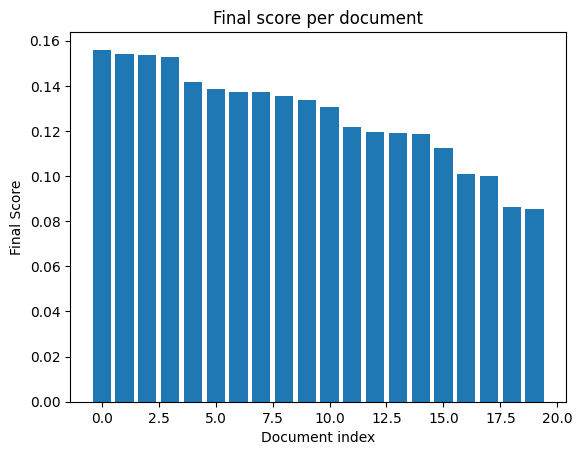

In [3]:
import matplotlib.pyplot as plt

scores = [doc.metadata["final_score"] for doc in docs]
plt.bar(range(len(scores)), scores)
plt.title("Final score per document")
plt.xlabel("Document index")
plt.ylabel("Final Score")
plt.show()